In [68]:
%reload_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_logistica as sl

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

import pickle

import warnings
warnings.filterwarnings("ignore")

# Ajuste logistica

In [69]:
picklee = pd.read_pickle("../datos/output/data_final_encoded.pkl")
df = pd.DataFrame(picklee)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Education_1,Education_2,Education_3,Education_4,Education_5,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,PerformanceRating_3,PerformanceRating_4
0,51,0,0.149569,0.150224,6,0.166667,1,0.145038,0.124814,131160,1.0,11,1.0,6,1,0,0,0.136966,0.113521,0.167812,0.153226,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,31,1,0.249097,0.157128,10,0.166667,1,0.181507,0.255319,41890,0.0,23,6.0,3,5,1,4,0.136966,0.164286,0.178414,0.160000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,32,0,0.249097,0.157128,17,0.121951,1,0.168712,0.124814,193280,1.0,15,5.0,2,5,0,3,0.149533,0.164286,0.313808,0.153226,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,38,0,0.080000,0.157128,2,0.166667,1,0.134615,0.124814,83210,3.0,11,13.0,5,8,7,5,0.135115,0.113521,0.142328,0.160000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32,0,0.149569,0.157128,10,0.161638,1,0.168712,0.255319,23420,4.0,12,9.0,2,6,0,4,0.135115,0.229070,0.142328,0.153226,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [70]:
soporte = sl.AnalisisModelosClasificacion(df, "Attrition")
soporte.ajustar_modelo("logistic_regression")
soporte.calcular_metricas("logistic_regression")

,train,test
accuracy,0.839286,0.840136
precision,0.811767,0.705829
recall,0.839286,0.840136
f1,0.768387,0.767148
kappa,0.015782,0.000000
auc,0.707012,0.684019


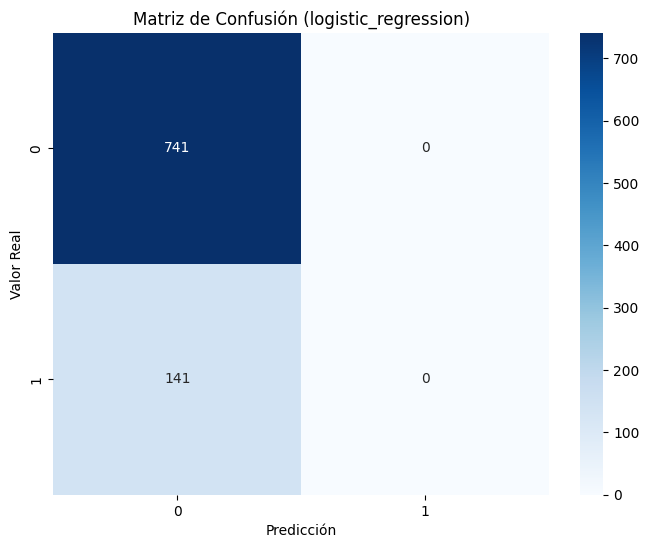

In [71]:
soporte.plot_matriz_confusion("logistic_regression")

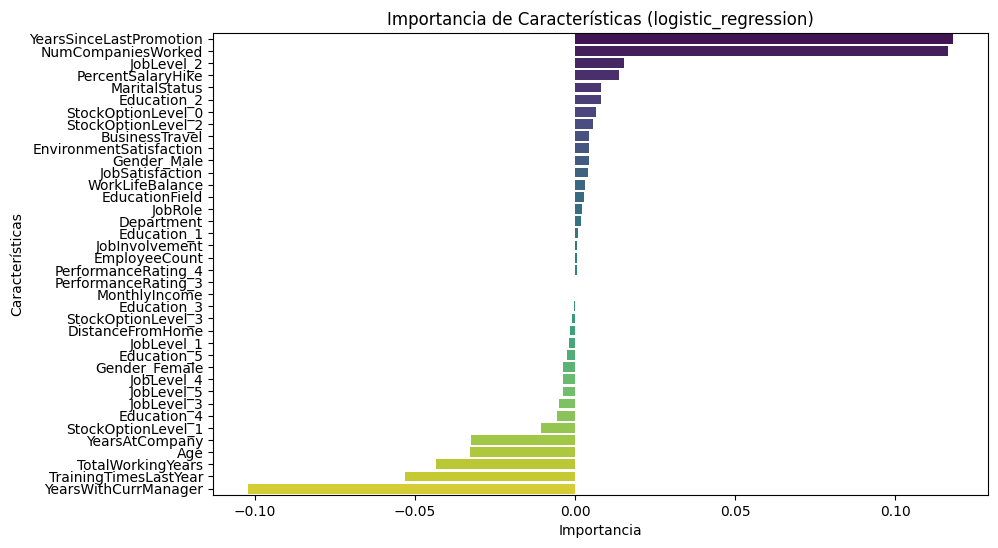

In [72]:
soporte.importancia_predictores("logistic_regression")

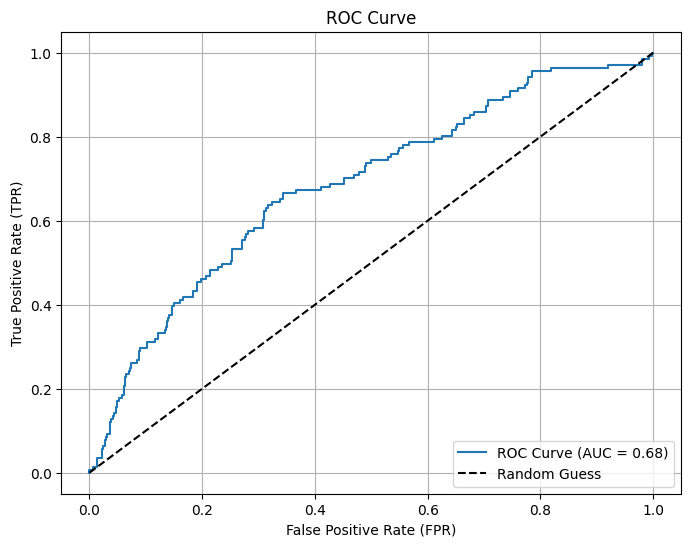

In [73]:
soporte.hacer_roc_curve("logistic_regression")

In [74]:
# df.to_pickle("datos/financial_data_target_ajustado.pkl")

In [75]:
# df.drop(columns=["customer_age"], inplace=True)
# soporte = sl.AnalisisModelosClasificacion(df, "is_fraudulent")
# soporte.ajustar_modelo("logistic_regression")
# soporte.calcular_metricas("logistic_regression")

In [76]:
# soporte.plot_matriz_confusion("logistic_regression")

# Conclusiones
He eliminado las columnas = ["transaction_id", "customer_id", "merchant_id", "amount", "transaction_time", "transaction_description"] porque son columnas que no son importantes y se me olvido quitarlas en el preprocesamiento.

Tengo un modelo que tiene 0.07 en el kappa pero 0.54 en AUC. El kappa me da a entender que la prediccion es pesima y el auc me da a entender que predecimmos al azar.

# Logistica ensamble

In [77]:
%reload_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_logistica_ensamble as sle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

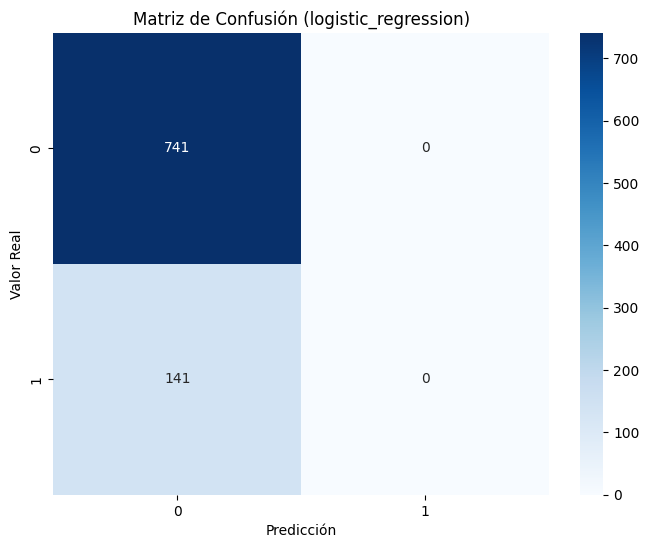

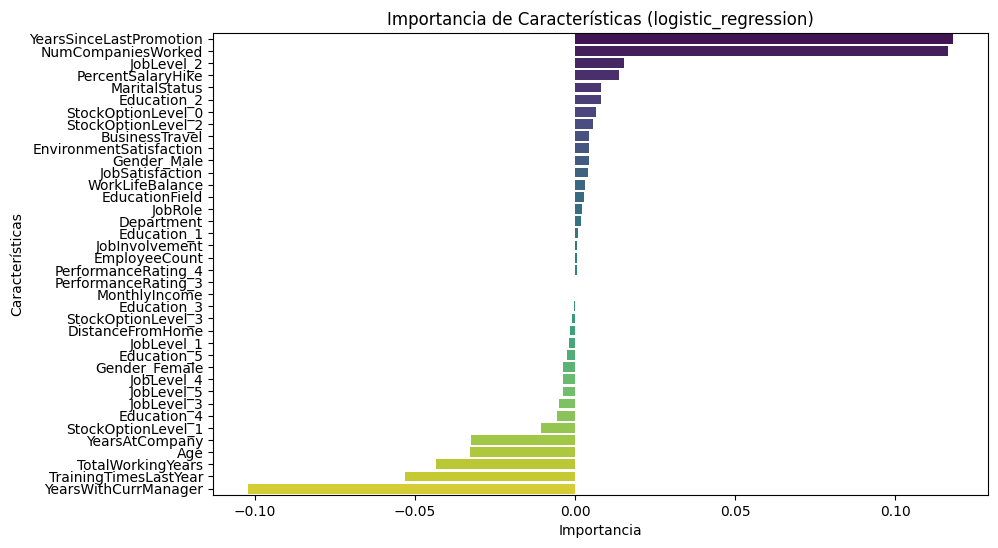

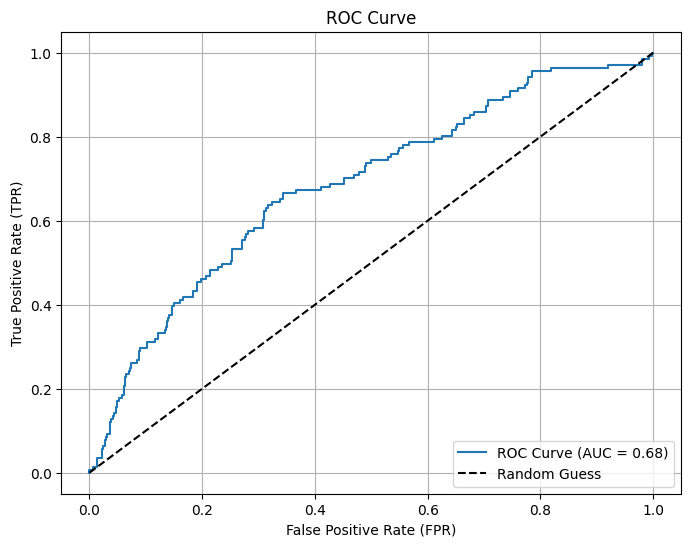

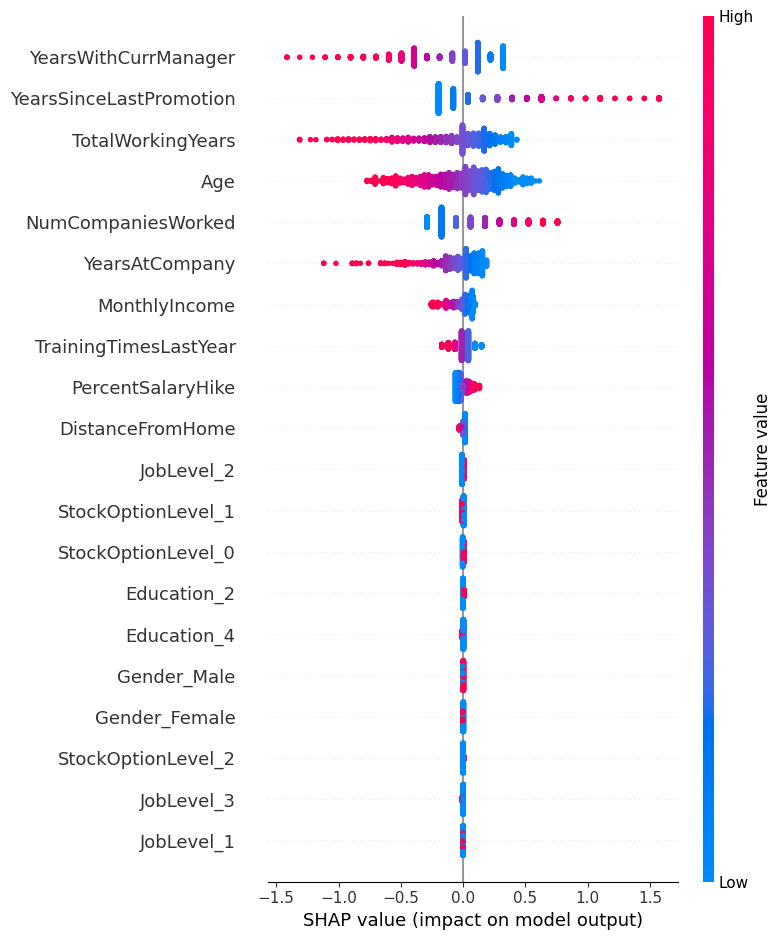

,train,test
accuracy,0.839286,0.840136
precision,0.811767,0.705829
recall,0.839286,0.840136
f1,0.768387,0.767148
kappa,0.015782,0.0
auc,0.707012,0.684019
time_seconds,0.001001,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.001001


El mejor modelo es DecisionTreeClassifier(max_depth=10)


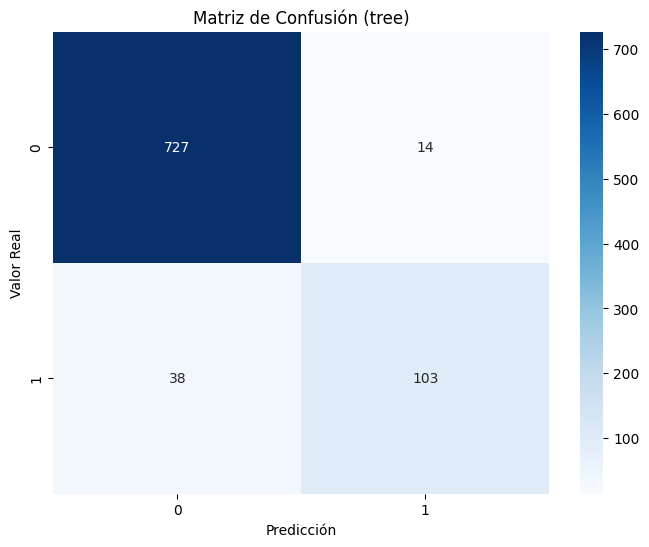

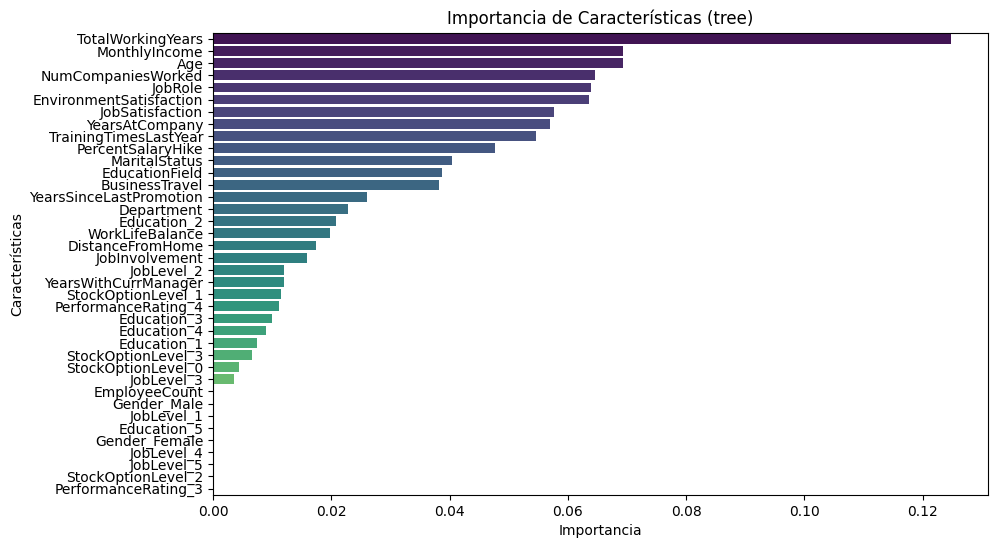

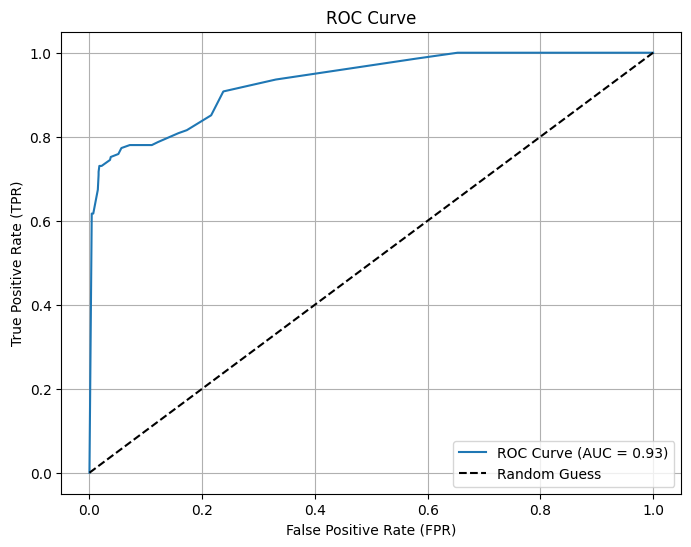

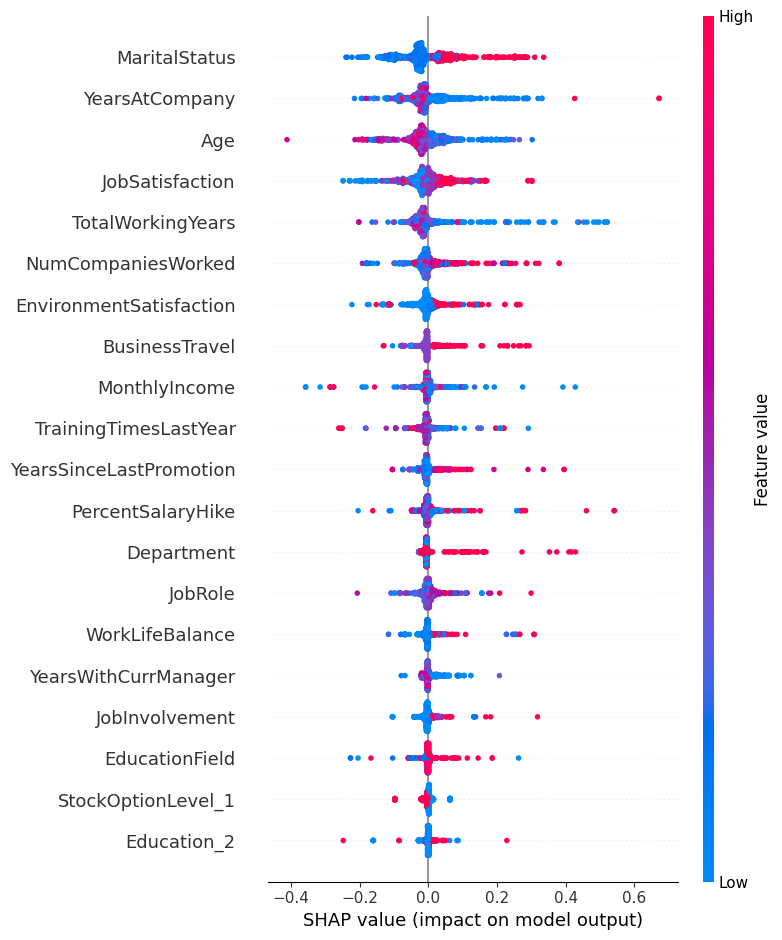

,train,test,train,test
accuracy,0.839286,0.840136,0.967687,0.941043
precision,0.811767,0.705829,0.967624,0.939139
recall,0.839286,0.840136,0.967687,0.941043
f1,0.768387,0.767148,0.966683,0.938771
kappa,0.015782,0.0,0.873567,0.764271
auc,0.707012,0.684019,0.969943,0.930925
time_seconds,0.001001,NaN,0.001997,NaN
n_jobs,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree
tiempo_computacion(segundos),NaN,0.001001,NaN,0.001997


El mejor modelo es RandomForestClassifier(max_depth=20, n_estimators=200)


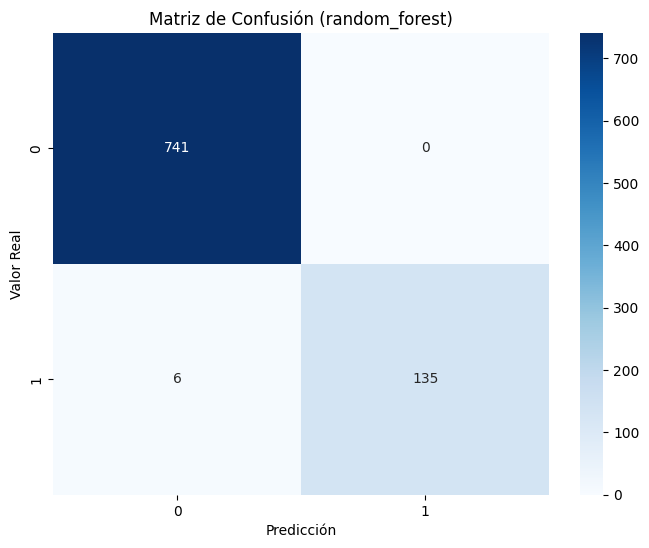

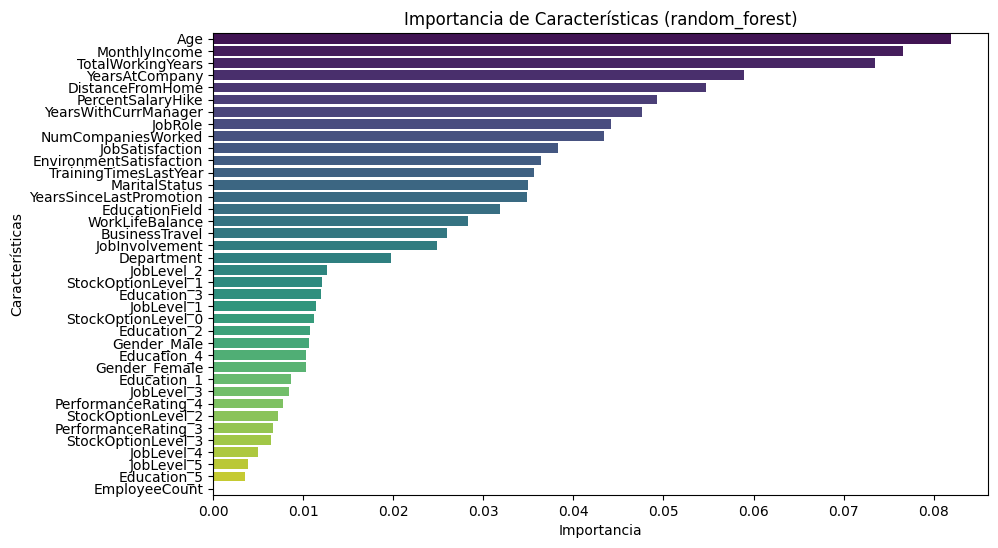

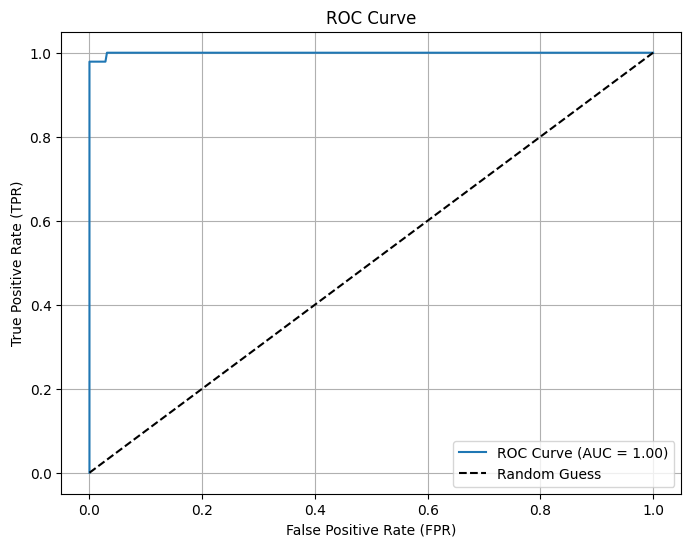

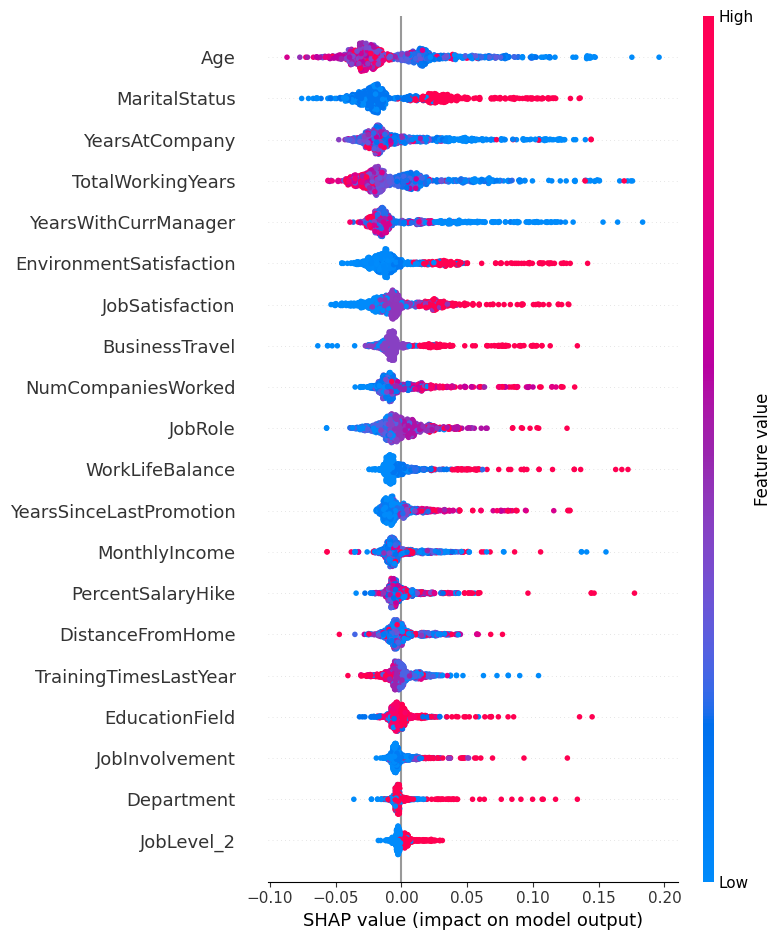

,train,test,train,test,train,test
accuracy,0.839286,0.840136,0.967687,0.941043,1.0,0.993197
precision,0.811767,0.705829,0.967624,0.939139,1.0,0.993252
recall,0.839286,0.840136,0.967687,0.941043,1.0,0.993197
f1,0.768387,0.767148,0.966683,0.938771,1.0,0.993137
kappa,0.015782,0.0,0.873567,0.764271,1.0,0.974231
auc,0.707012,0.684019,0.969943,0.930925,1.0,0.999368
time_seconds,0.001001,NaN,0.001997,NaN,0.059531,NaN
n_jobs,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest
tiempo_computacion(segundos),NaN,0.001001,NaN,0.001997,NaN,0.059531


El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200,
                           subsample=0.8)


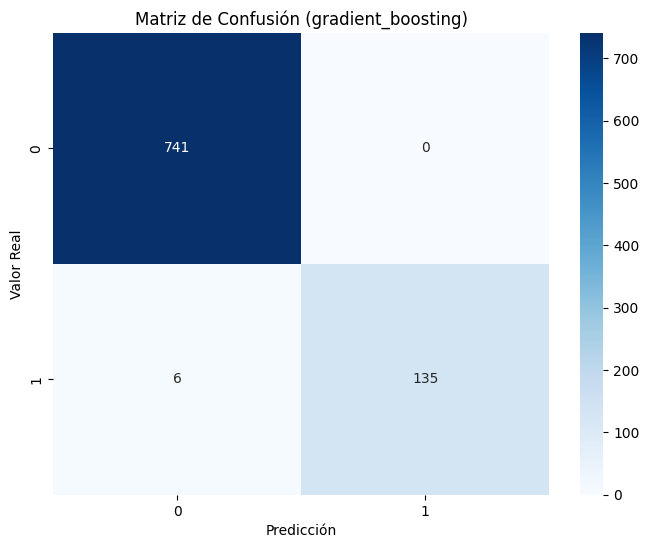

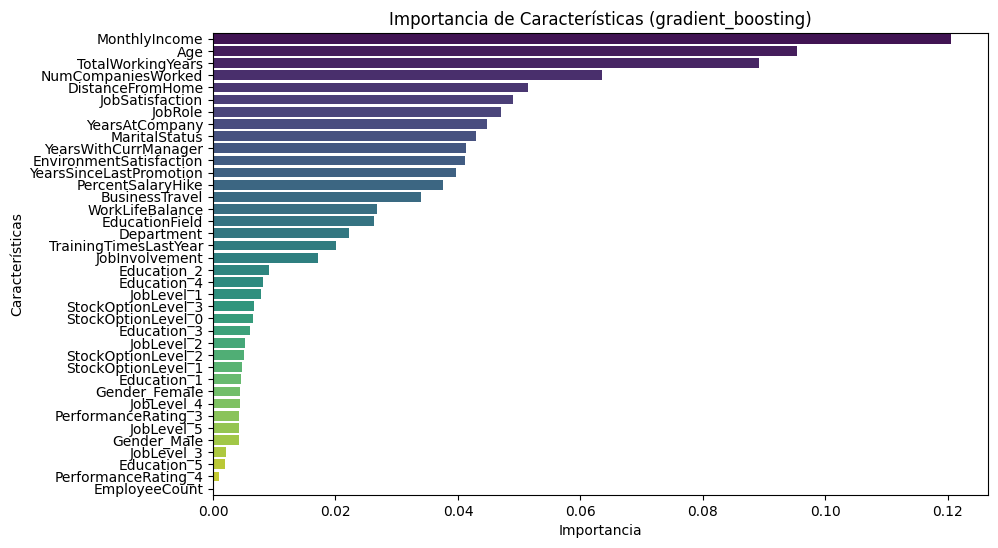

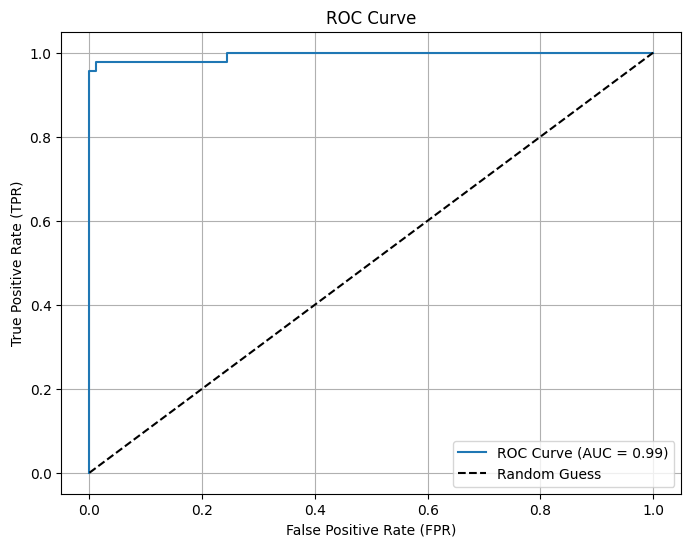

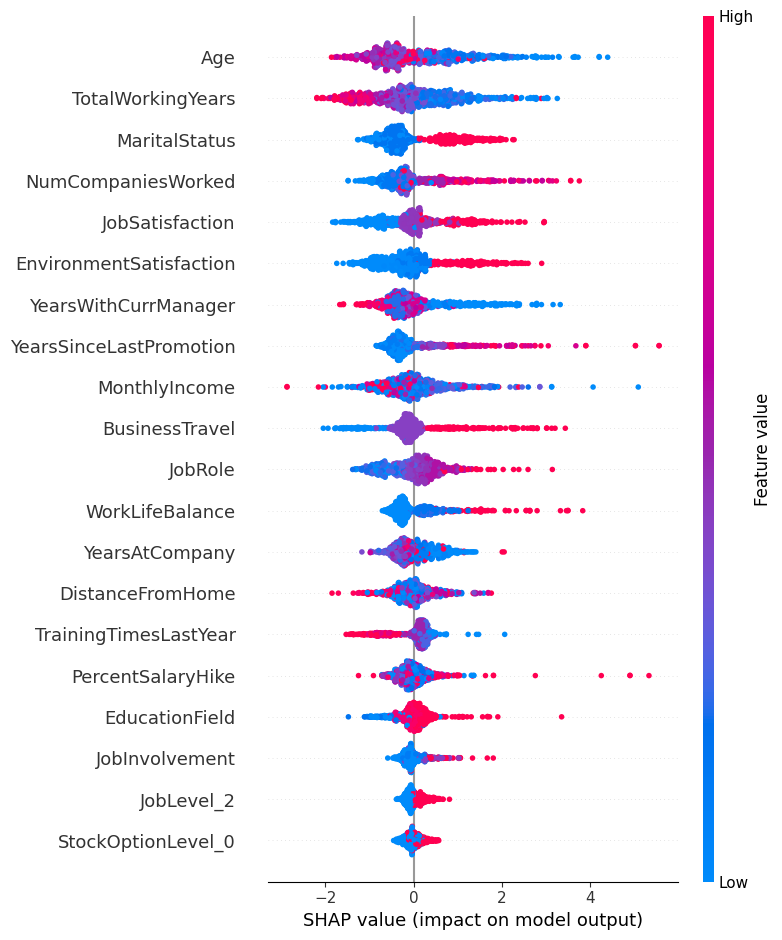

,train,test,train,test,train,test,train,test
accuracy,0.839286,0.840136,0.967687,0.941043,1.0,0.993197,1.0,0.993197
precision,0.811767,0.705829,0.967624,0.939139,1.0,0.993252,1.0,0.993252
recall,0.839286,0.840136,0.967687,0.941043,1.0,0.993197,1.0,0.993197
f1,0.768387,0.767148,0.966683,0.938771,1.0,0.993137,1.0,0.993137
kappa,0.015782,0.0,0.873567,0.764271,1.0,0.974231,1.0,0.974231
auc,0.707012,0.684019,0.969943,0.930925,1.0,0.999368,1.0,0.994544
time_seconds,0.001001,NaN,0.001997,NaN,0.059531,NaN,0.018006,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting
tiempo_computacion(segundos),NaN,0.001001,NaN,0.001997,NaN,0.059531,NaN,0.018006


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


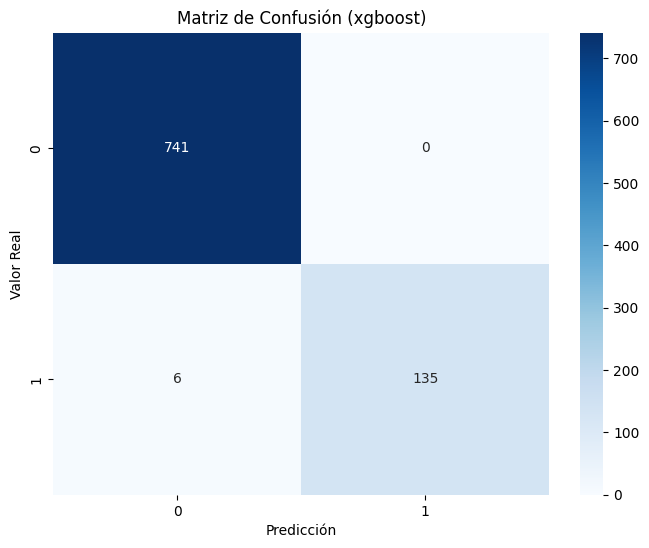

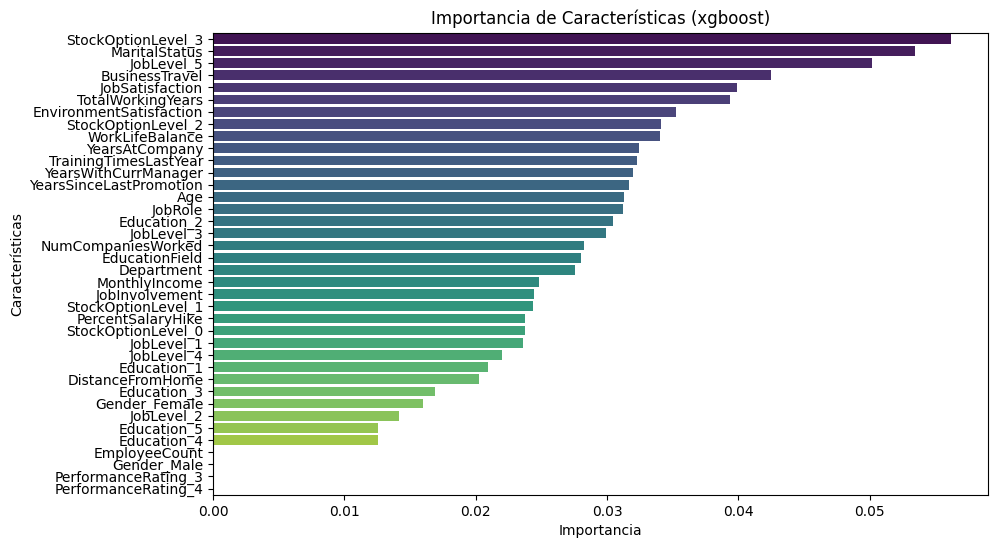

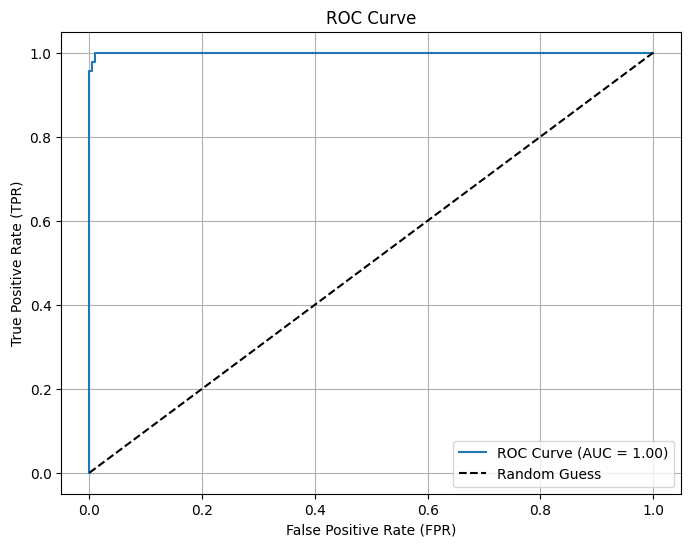

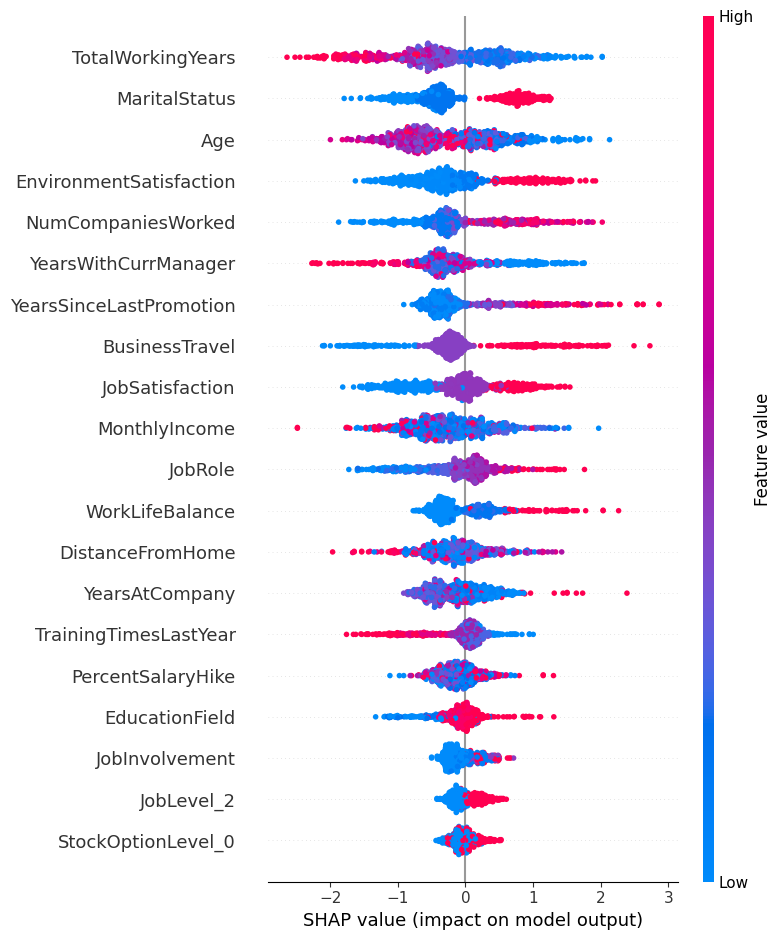

,train,test,train,test,train,test,train,test,train,test
accuracy,0.839286,0.840136,0.967687,0.941043,1.0,0.993197,1.0,0.993197,1.0,0.993197
precision,0.811767,0.705829,0.967624,0.939139,1.0,0.993252,1.0,0.993252,1.0,0.993252
recall,0.839286,0.840136,0.967687,0.941043,1.0,0.993197,1.0,0.993197,1.0,0.993197
f1,0.768387,0.767148,0.966683,0.938771,1.0,0.993137,1.0,0.993137,1.0,0.993137
kappa,0.015782,0.0,0.873567,0.764271,1.0,0.974231,1.0,0.974231,1.0,0.974231
auc,0.707012,0.684019,0.969943,0.930925,1.0,0.999368,1.0,0.994544,1.0,0.999713
time_seconds,0.001001,NaN,0.001997,NaN,0.059531,NaN,0.018006,NaN,0.012632,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting,xgboost,xgboost
tiempo_computacion(segundos),NaN,0.001001,NaN,0.001997,NaN,0.059531,NaN,0.018006,NaN,0.012632


,accuracy,precision,recall,f1,kappa
train,0.839286,0.811767,0.839286,0.768387,0.015782
test,0.840136,0.705829,0.840136,0.767148,0.0
train,0.967687,0.967624,0.967687,0.966683,0.873567
test,0.941043,0.939139,0.941043,0.938771,0.764271
train,1.0,1.0,1.0,1.0,1.0
test,0.993197,0.993252,0.993197,0.993137,0.974231
train,1.0,1.0,1.0,1.0,1.0
test,0.993197,0.993252,0.993197,0.993137,0.974231
train,1.0,1.0,1.0,1.0,1.0
test,0.993197,0.993252,0.993197,0.993137,0.974231


In [78]:
lista_modelos = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_metricas = pd.DataFrame()
soporte = sle.AnalisisModelosClasificacion(df, "Attrition")
for modelo in lista_modelos:
    # soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
    soporte.ajustar_modelo(modelo)
    df_temp = soporte.calcular_metricas(modelo)
    df_metricas = pd.concat([df_metricas, df_temp], axis=1)
    soporte.plot_matriz_confusion(modelo)
    soporte.importancia_predictores(modelo)
    soporte.hacer_roc_curve(modelo)
    soporte.plot_shap_summary(modelo)
    display(df_metricas)
df_metricas.head().T

In [79]:
df_resultados_colores = df_metricas.T.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sle.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo,tiempo_computacion(segundos),nucleos_usados
0,0.839286,0.811767,0.839286,0.768387,0.015782,0.707012,0.001001,None,logistic_regression,nan,nan
1,0.840136,0.705829,0.840136,0.767148,0.000000,0.684019,nan,nan,logistic_regression,0.001001,None
2,0.967687,0.967624,0.967687,0.966683,0.873567,0.969943,0.001997,16,tree,nan,nan
3,0.941043,0.939139,0.941043,0.938771,0.764271,0.930925,nan,nan,tree,0.001997,16
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.059531,None,random_forest,nan,nan
5,0.993197,0.993252,0.993197,0.993137,0.974231,0.999368,nan,nan,random_forest,0.059531,None
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.018006,16,gradient_boosting,nan,nan
7,0.993197,0.993252,0.993197,0.993137,0.974231,0.994544,nan,nan,gradient_boosting,0.018006,16
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.012632,None,xgboost,nan,nan
9,0.993197,0.993252,0.993197,0.993137,0.974231,0.999713,nan,nan,xgboost,0.012632,None


In [80]:
df_metricas.T

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo,tiempo_computacion(segundos),nucleos_usados
train,0.839286,0.811767,0.839286,0.768387,0.015782,0.707012,0.001001,None,logistic_regression,NaN,NaN
test,0.840136,0.705829,0.840136,0.767148,0.0,0.684019,NaN,NaN,logistic_regression,0.001001,None
train,0.967687,0.967624,0.967687,0.966683,0.873567,0.969943,0.001997,16,tree,NaN,NaN
test,0.941043,0.939139,0.941043,0.938771,0.764271,0.930925,NaN,NaN,tree,0.001997,16
train,1.0,1.0,1.0,1.0,1.0,1.0,0.059531,None,random_forest,NaN,NaN
test,0.993197,0.993252,0.993197,0.993137,0.974231,0.999368,NaN,NaN,random_forest,0.059531,None
train,1.0,1.0,1.0,1.0,1.0,1.0,0.018006,16,gradient_boosting,NaN,NaN
test,0.993197,0.993252,0.993197,0.993137,0.974231,0.994544,NaN,NaN,gradient_boosting,0.018006,16
train,1.0,1.0,1.0,1.0,1.0,1.0,0.012632,None,xgboost,NaN,NaN
test,0.993197,0.993252,0.993197,0.993137,0.974231,0.999713,NaN,NaN,xgboost,0.012632,None
